# Iris dataset + simple classification example

## Loading data from scikit-learn

In [49]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()

X= pd.DataFrame(
    iris['data'],
    columns= iris['feature_names'])
y = pd.DataFrame(
    [iris.target_names[i] for i in iris['target']],
    columns=['target'])
df = X.join(y)
df


sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

        target  
0       setosa  
1       setosa  
2       setosa  
3       setosa  
4       setosa  
..         ...  
145  virginica  
146  virginica  
147  virginica  
148  virginica  
149  virginica  

[150 rows x 5 columns]

In [50]:
df.describe()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000

## Visualization with seaborn

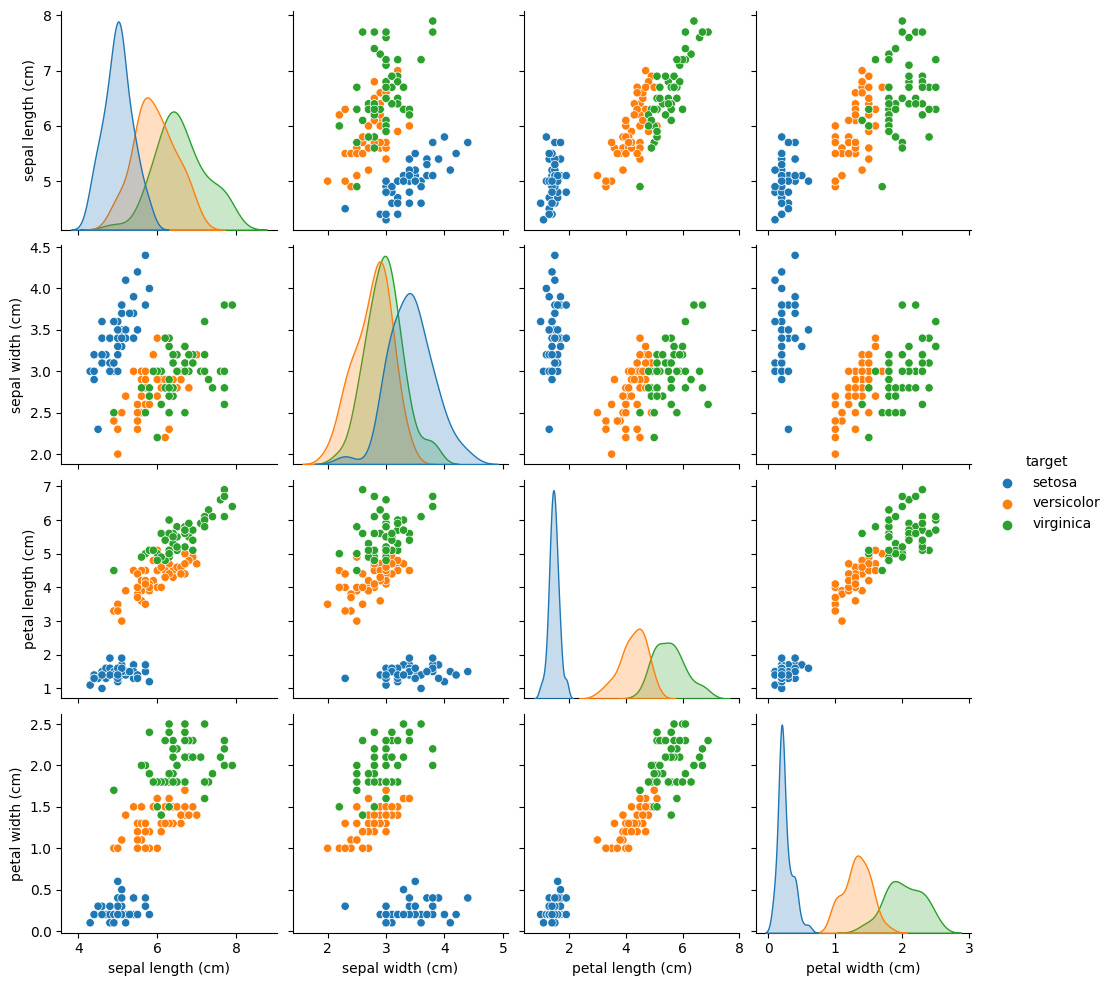

In [51]:
import seaborn as sns
sns.pairplot(
    df,
    hue="target",
    diag_kind="kde")

## Extract features, target and build Naive Bayes model

In [52]:
SEED = 6

from sklearn.model_selection import train_test_split
import numpy as np
np.random.seed(SEED)
import pandas as pd

# 4 features and 1 target
data = df.values
X = data[:,:4]
y = data[:,4]

# 80% Train and 20% test (shuffled)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

pd.DataFrame.from_dict({"features": [", ".join(str(x) for x in row) for row in X_train], "target": y_train}).head()


features      target
0  4.8, 3.0, 1.4, 0.3      setosa
1  5.2, 2.7, 3.9, 1.4  versicolor
2  5.4, 3.9, 1.3, 0.4      setosa
3  4.3, 3.0, 1.1, 0.1      setosa
4  6.3, 2.8, 5.1, 1.5   virginica

In [53]:
# model
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)
clf.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [54]:
import pandas as pd

y_pred = clf.predict(X_test)
pd.DataFrame.from_dict({
    "features": [", ".join(str(x) for x in row) for row in X_test],
    "true": y_test,
    "prediction": y_pred,
    "error": [("" if t == p else "X") for t, p in zip(y_test, y_pred)]
})


features        true  prediction error
0   5.0, 3.6, 1.4, 0.2      setosa      setosa      
1   6.5, 3.0, 5.5, 1.8   virginica   virginica      
2   4.7, 3.2, 1.3, 0.2      setosa      setosa      
3   5.1, 3.3, 1.7, 0.5      setosa      setosa      
4   6.3, 2.7, 4.9, 1.8   virginica   virginica      
5   5.7, 2.9, 4.2, 1.3  versicolor  versicolor      
6   6.1, 2.6, 5.6, 1.4   virginica  versicolor     X
7   5.1, 3.4, 1.5, 0.2      setosa      setosa      
8   6.4, 3.1, 5.5, 1.8   virginica   virginica      
9   5.5, 2.3, 4.0, 1.3  versicolor  versicolor      
10  6.1, 3.0, 4.9, 1.8   virginica   virginica      
11  5.5, 2.4, 3.7, 1.0  versicolor  versicolor      
12  6.4, 3.2, 5.3, 2.3   virginica   virginica      
13  7.7, 3.0, 6.1, 2.3   virginica   virginica      
14  6.4, 2.9, 4.3, 1.3  versicolor  versicolor      
15  6.0, 2.2, 5.0, 1.5   virginica  versicolor     X
16  7.6, 3.0, 6.6, 2.1   virginica   virginica      
17  6.4, 3.2, 4.5, 1.5  versicolor  versicolor      
18  5.8, 2.6, 4.0, 1.2  versicolor  versicolor      
19  5.2, 4.1, 1.5, 0.1      setosa      setosa      
20  4.9, 3.6, 1.4, 0.1      setosa      setosa      
21  6.9, 3.2, 5.7, 2.3   virginica   virginica      
22  5.1, 3.8, 1.9, 0.4      setosa      setosa      
23  5.1, 3.5, 1.4, 0.2      setosa      setosa      
24  5.7, 2.8, 4.5, 1.3  versicolor  versicolor      
25  6.3, 2.5, 4.9, 1.5  versicolor  versicolor      
26  6.3, 2.3, 4.4, 1.3  versicolor  versicolor      
27  7.1, 3.0, 5.9, 2.1   virginica   virginica      
28  4.8, 3.1, 1.6, 0.2      setosa      setosa      
29  5.0, 2.3, 3.3, 1.0  versicolor  versicolor

## Report

In [55]:
from sklearn.metrics import classification_report
y_pred = clf.predict(X_test)
labels = ['setosa','versicolor','virginica']
print(classification_report(y_test, y_pred, labels=labels))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       0.83      1.00      0.91        10
   virginica       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30



## Confusion matrix

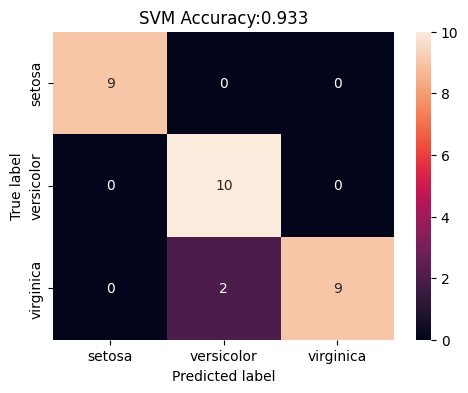

In [56]:
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(
    cm,
    index = ['setosa','versicolor','virginica'], 
    columns = ['setosa','versicolor','virginica'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title('SVM Accuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## Train again with SVM

In [57]:
# model
from sklearn.svm import SVC
clf = SVC(kernel="linear", random_state=SEED)
clf.fit(X_train, y_train)
clf.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': 6,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [58]:
y_pred = clf.predict(X_test)
pd.DataFrame.from_dict({
    "features": [", ".join(str(x) for x in row) for row in X_test],
    "true": y_test,
    "prediction": y_pred,
    "error": [("" if t == p else "X") for t, p in zip(y_test, y_pred)]
})

features        true  prediction error
0   5.0, 3.6, 1.4, 0.2      setosa      setosa      
1   6.5, 3.0, 5.5, 1.8   virginica   virginica      
2   4.7, 3.2, 1.3, 0.2      setosa      setosa      
3   5.1, 3.3, 1.7, 0.5      setosa      setosa      
4   6.3, 2.7, 4.9, 1.8   virginica   virginica      
5   5.7, 2.9, 4.2, 1.3  versicolor  versicolor      
6   6.1, 2.6, 5.6, 1.4   virginica   virginica      
7   5.1, 3.4, 1.5, 0.2      setosa      setosa      
8   6.4, 3.1, 5.5, 1.8   virginica   virginica      
9   5.5, 2.3, 4.0, 1.3  versicolor  versicolor      
10  6.1, 3.0, 4.9, 1.8   virginica   virginica      
11  5.5, 2.4, 3.7, 1.0  versicolor  versicolor      
12  6.4, 3.2, 5.3, 2.3   virginica   virginica      
13  7.7, 3.0, 6.1, 2.3   virginica   virginica      
14  6.4, 2.9, 4.3, 1.3  versicolor  versicolor      
15  6.0, 2.2, 5.0, 1.5   virginica   virginica      
16  7.6, 3.0, 6.6, 2.1   virginica   virginica      
17  6.4, 3.2, 4.5, 1.5  versicolor  versicolor      
18  5.8, 2.6, 4.0, 1.2  versicolor  versicolor      
19  5.2, 4.1, 1.5, 0.1      setosa      setosa      
20  4.9, 3.6, 1.4, 0.1      setosa      setosa      
21  6.9, 3.2, 5.7, 2.3   virginica   virginica      
22  5.1, 3.8, 1.9, 0.4      setosa      setosa      
23  5.1, 3.5, 1.4, 0.2      setosa      setosa      
24  5.7, 2.8, 4.5, 1.3  versicolor  versicolor      
25  6.3, 2.5, 4.9, 1.5  versicolor  versicolor      
26  6.3, 2.3, 4.4, 1.3  versicolor  versicolor      
27  7.1, 3.0, 5.9, 2.1   virginica   virginica      
28  4.8, 3.1, 1.6, 0.2      setosa      setosa      
29  5.0, 2.3, 3.3, 1.0  versicolor  versicolor

## Report & confusion matrix

In [59]:
y_pred = clf.predict(X_test)
labels = ['setosa','versicolor','virginica']
print(classification_report(y_test, y_pred, labels=labels))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



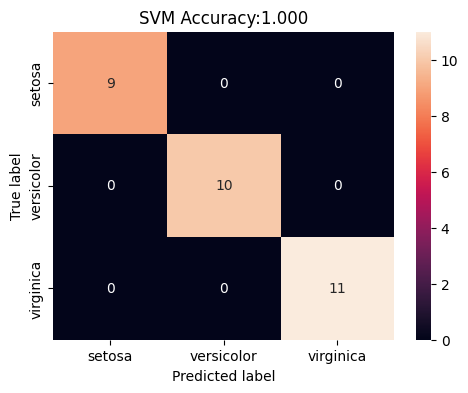

In [60]:
cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(
    cm,
    index = ['setosa','versicolor','virginica'], 
    columns = ['setosa','versicolor','virginica'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title('SVM Accuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()